
**FrozenLake8X8-v0 Review**

Goal : 'S' 즉 시작점에서 'G' 목표지점까지 가는데에 'F'를 따라서 가며 'H' 는 빠지는 함정 구멍이다.

Action_Space : print(env.action_space) 출력값은

-> Discrete(4) # Up, Down, Left, Right이다.

Observation_space : print(env.observation_space) 출력값은

-> Discrete(64) # 가로세로 8X8 배열이라 64개 이다.

render 출력은 아래의 화면처럼 나온다.

SFFFFFFF

FFFFFFFF

FFFHFFFF

FFFFFHFF

FFFHFFFF

FHHFFFHF

FHFFHFHF

FFFHFFFG


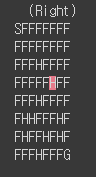

In [ ]:
import gym
import numpy as np
from time import sleep
from IPython.display import display, clear_output, Pretty

In [ ]:
#
# Environment
#
env = gym.make('FrozenLake8x8-v0')
state = env.reset()

# Initial world display
world = env.render(mode='ansi')
display(Pretty(world))
sleep(0.5)

#
# Agent
#
for step in range(100):
    action =env.action_space.sample()
    next_state, reward, done, info = env.step(action)    
    state = next_state
    
    # updated world display
    world = env.render(mode='ansi')
    clear_output(wait=True)
    display(Pretty(world))
    sleep(0.5)
    
    if done: # an episode finished
        print("Episode finished after {} timesteps".format(step+1))
        break

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Episode finished after 7 timesteps


In [ ]:
print(env.observation_space)
print(env.action_space)

Discrete(64)
Discrete(4)


In [ ]:
env.P[55]

{0: [(0.3333333333333333, 47, 0.0, False),
  (0.3333333333333333, 54, 0.0, True),
  (0.3333333333333333, 63, 1.0, True)],
 1: [(0.3333333333333333, 54, 0.0, True),
  (0.3333333333333333, 63, 1.0, True),
  (0.3333333333333333, 55, 0.0, False)],
 2: [(0.3333333333333333, 63, 1.0, True),
  (0.3333333333333333, 55, 0.0, False),
  (0.3333333333333333, 47, 0.0, False)],
 3: [(0.3333333333333333, 55, 0.0, False),
  (0.3333333333333333, 47, 0.0, False),
  (0.3333333333333333, 54, 0.0, True)]}

In [ ]:
from tqdm import tqdm

num_state = env.observation_space.n
num_action = env.action_space.n
num_episode = 5000

# Initialize Q_table 
Q_table = np.random.uniform(low=0.0, high=0.00000001, size=(num_state, num_action))
# Zero for terminate states
for s in [19, 29, 35, 41, 42, 49, 52, 54, 59, 63]:
    Q_table[s] = 0

# Hyper parameter
epsilon = 0.3
alpha = 0.1
gamma = 0.9

for episode in tqdm(range(num_episode)):
    state = env.reset()
    done = False
    while not done:
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state])
        next_state, reward, done, info = env.step(action)
        
        target = reward + gamma*Q_table[next_state, np.argmax(Q_table[next_state])] 
        delta = target - Q_table[state][action]
        Q_table[state][action] += alpha * delta
        state = next_state

100%|██████████| 5000/5000 [00:05<00:00, 897.95it/s]


In [ ]:
state = env.reset()
done = False

# Initial world display
world = env.render(mode='ansi')
display(Pretty(world))
sleep(0.5)

while not done:
    action = np.argmax(Q_table[state]) # Optimal Policy
    state, reward, done, info = env.step(action)
    
    # updated world display
    world = env.render(mode='ansi')
    clear_output(wait=True)
    display(Pretty(world))
    sleep(0.5)
    
    if done and state == 63:
        print('\n 성공!')

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
